# Experiment 9
Implement GAN architecture on MNIST dataset to recognize the handwritten digits.

##**Importing Necessary libraries**


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

## **Pre-processing**
**Normalizing the data into 0 to 1 and reshaping the size**

In [ ]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

## **Adding noise to the original images**

In [ ]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

## **Visualizing the images**

In [ ]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


## **Preparing the data**

11490434/11490434 [==============================] - 0s 0us/step


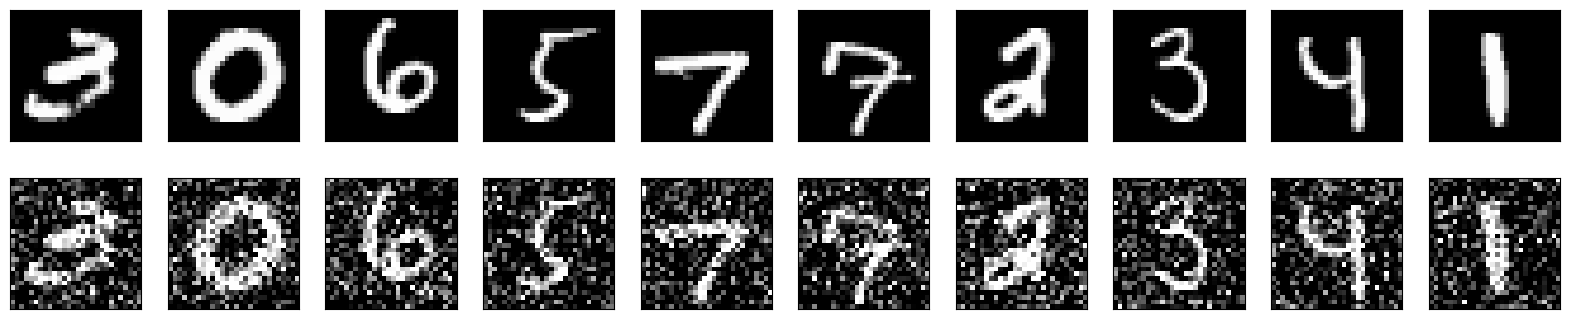

In [ ]:

# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

## **Building the Autoencoder**

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

## **Training the model**

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 146s 309ms/step - loss: 0.1289 - val_loss: 0.0730
Epoch 2/50
469/469 [==============================] - 133s 284ms/step - loss: 0.0714 - val_loss: 0.0692
Epoch 3/50
469/469 [==============================] - 134s 285ms/step - loss: 0.0690 - val_loss: 0.0678
Epoch 4/50
469/469 [==============================] - 134s 285ms/step - loss: 0.0679 - val_loss: 0.0670
Epoch 5/50
469/469 [==============================] - 133s 284ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 6/50
469/469 [==============================] - 134s 286ms/step - loss: 0.0666 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 131s 278ms/step - loss: 0.0661 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 129s 276ms/step - loss: 0.0658 - val_loss: 0.0653
Epoch 9/50
469/469 [==============================] - 130s 278ms/step - loss: 0.0655 - val_loss: 0.0649
Epoch 10/50
469/469 [==============================] - 130s 278m

## **Prediction**

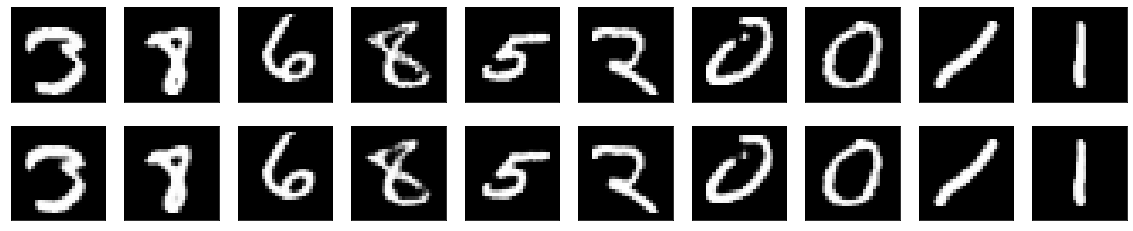

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0997 - val_loss: 0.0928
Epoch 2/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0925 - val_loss: 0.0908
Epoch 3/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0909 - val_loss: 0.0901
Epoch 4/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0900 - val_loss: 0.0889
Epoch 5/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0894 - val_loss: 0.0883
Epoch 6/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0888 - val_loss: 0.0878
Epoch 7/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0884 - val_loss: 0.0876
Epoch 8/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0880 - val_loss: 0.0871
Epoch 9/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.08

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)